# Review Section

## Example

In [55]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime


TICKERS = ['MSFT', 'GOOGL']
START_DATE = '2022-01-01'
END_DATE = '2024-06-30'

# Download adjusted close prices for all tickers
adj_prices = yf.download(TICKERS, start=START_DATE, end=END_DATE, progress=False)['Adj Close']
adj_prices.columns.name = None
adj_prices.index.name = 'date'
adj_prices.index = adj_prices.index.map(lambda x: pd.to_datetime(x).date())
adj_prices.dropna(axis=0, inplace=True)
adj_prices

,GOOGL,MSFT
date,,
2022-01-03,144.633362,326.940857
2022-01-04,144.042831,321.334717
2022-01-05,137.434677,308.999359
2022-01-06,137.407257,306.557678
2022-01-07,136.678558,306.713989
...,...,...
2024-06-24,178.982498,446.864594
2024-06-25,183.786118,450.138672
2024-06-26,183.636322,451.346497


### Prices

<Axes: title={'center': 'Stock Prices'}, xlabel='Date', ylabel='Prices'>

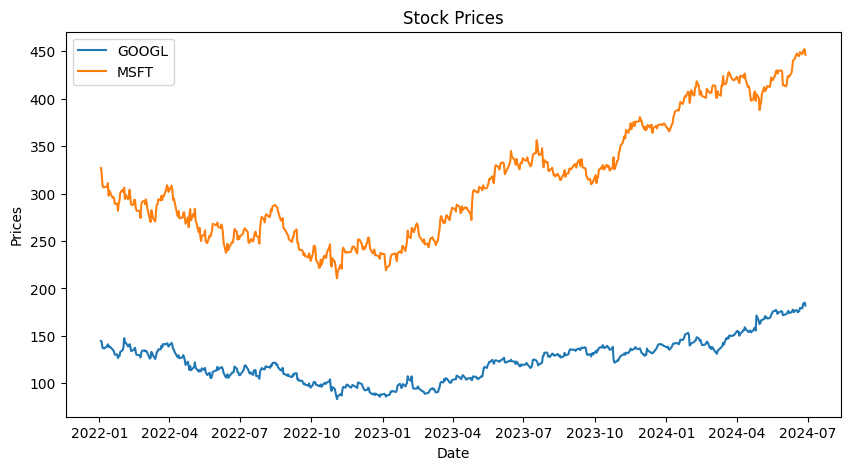

In [57]:
adj_prices.plot(title='Stock Prices', ylabel='Prices', xlabel='Date', figsize=(10, 5))

### Returns

In [63]:
adj_returns = adj_prices.pct_change()
adj_returns.dropna(axis=0, inplace=True)

<Axes: title={'center': 'Stock Returns'}, xlabel='Date', ylabel='Daily Returns'>

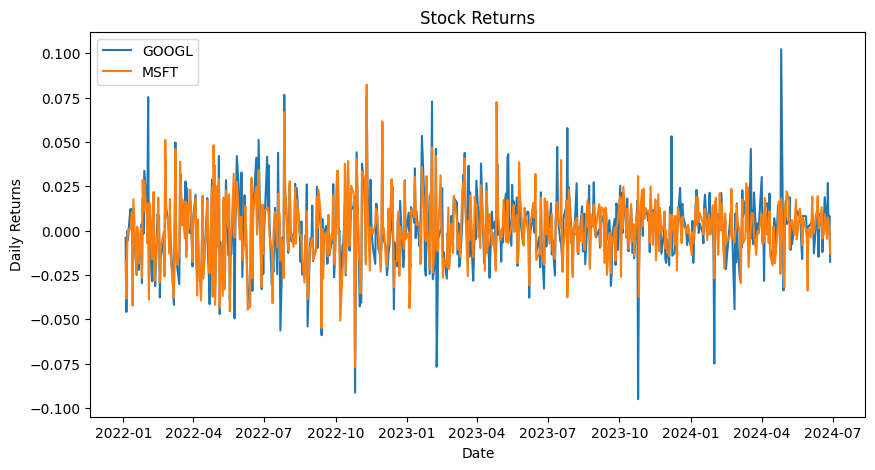

In [68]:
adj_returns.plot(title='Stock Returns', ylabel='Daily Returns', xlabel='Date', figsize=(10, 5))

### Covariances

In [46]:
adj_returns.cov()

,GOOGL,MSFT
GOOGL,0.000450,0.000273
MSFT,0.000273,0.000329


### Correlations

In [47]:
adj_returns.corr()

,GOOGL,MSFT
GOOGL,1.000000,0.709079
MSFT,0.709079,1.000000


### Mean Returns

In [48]:
adj_returns.mean()

GOOGL    0.000592
MSFT     0.000662
dtype: float64

### Volatility

In [49]:
adj_returns.std()

GOOGL    0.021219
MSFT     0.018127
dtype: float64

### Calculation of a Single Pandas Series

In [75]:
adj_returns['GOOGL']

date
2022-01-04   -0.004083
2022-01-05   -0.045876
2022-01-06   -0.000200
2022-01-07   -0.005303
2022-01-10    0.012061
                ...   
2024-06-24   -0.002283
2024-06-25    0.026838
2024-06-26   -0.000815
2024-06-27    0.008321
2024-06-28   -0.017583
Name: GOOGL, Length: 624, dtype: float64

In [76]:
adj_returns['GOOGL'].mean()

np.float64(0.000592342164253753)

In [78]:
adj_returns['GOOGL'].std()

np.float64(0.02121888076348244)

### Annualized Volatility
- Annualize Monthly Volatility multiplying by $\sqrt{12}$
- Annualize Daily Volatility multiplying by $\sqrt{252}$

In [52]:
adj_returns.std() * np.sqrt(252)

GOOGL    0.336839
MSFT     0.287759
dtype: float64

### Portfolio Statistics

In [62]:
WEIGHTS = [.6, .4]

portfolio_adj_returns = WEIGHTS[0] * adj_returns['GOOGL'] + WEIGHTS[1] * adj_returns['MSFT']
portfolio_adj_returns

date
2022-01-03         NaN
2022-01-04   -0.011922
2022-01-05   -0.041383
2022-01-06   -0.004821
2022-01-07   -0.001815
                ...   
2024-06-24   -0.003728
2024-06-25    0.015131
2024-06-26    0.001284
2024-06-27    0.004244
2024-06-28   -0.014850
Length: 625, dtype: float64

In [71]:
round(portfolio_adj_returns.mean(), 6)

np.float64(0.000634)

In [72]:
round(WEIGHTS[0] * adj_returns['GOOGL'].mean() + WEIGHTS[1] * adj_returns['MSFT'].mean(), 6)

np.float64(0.000634)